# Project 6: Advanced Text Analysis with SpaCy

### Overview

In this project, we will enhance our text analysis techniques by applying proper data pre-processing to extract more meaningful information from literary texts. We'll continue working with the first two chapters of "Pride and Prejudice" but will implement advanced text cleaning methods using the SpaCy library to obtain more insightful word frequency results.

### Project Objectives

*   Apply proper text pre-processing techniques to extract
meaningful words

*   Use SpaCy to clean and normalize text data
*   Identify the 15 most frequently used meaningful words in a text

*   Analyze how pre-processing affects text analysis results
*   Apply the same techniques to a text of your choice

### Part 0: Text analysis without text cleaning (Lab5)

#### Loading Data

We will fetch the first two chapters of Jane Austen's Pride and Prejudice from [Project Gutenberg](https://www.gutenberg.org/ebooks/1342)


#### Function to fetch data

In [6]:
def fetch_text(raw_url):
  import requests
  from pathlib import Path
  import hashlib

  CACHE_DIR = Path("cs_110_content/text_cache")
  CACHE_DIR.mkdir(parents=True, exist_ok=True)

  def _url_to_filename(url):
    url_hash = hashlib.sha1(url.encode("utf-8")).hexdigest()[:12]
    return CACHE_DIR / f"{url_hash}.txt"

  cache_path = _url_to_filename(raw_url)

  SUCCESS_MSG = "✅ Text fetched."
  FAILURE_MSG = "❌ Failed to fetch text."
  try:
    if not cache_path.exists():
      response = requests.get(raw_url, timeout=10)
      response.raise_for_status()
      text_data = response.text
      cache_path.write_text(text_data, encoding="utf-8")
    print(SUCCESS_MSG)
    return cache_path.read_text(encoding="utf-8")

  except Exception as e:
    print(FAILURE_MSG)
    print(f"Error: {e}")
    return ""

#### Save the text in a variable

In [7]:
PRIDE_PREJUDICE_URL = "https://gist.githubusercontent.com/goodbadwolf/8514e63776c1e9717d844ea4ee407739/raw/fdc87a64fd18e6ddb01ce8d758f8f2de8d03e163/pride_prejudice_excerpt.txt"

pride_prejudice_text = fetch_text(PRIDE_PREJUDICE_URL)

✅ Text fetched.


#### Statistics about the data

In [8]:
def print_text_stats(text):
  num_chars = len(text)

  lines = text.splitlines()
  num_lines = len(lines)

  num_words = 0
  for line in lines:
    words_in_line = line.split()
    num_words_in_line = len(words_in_line)
    num_words += num_words_in_line

  print(f"Number of characters: {num_chars}")
  print(f"Number of lines: {num_lines}")
  print(f"Number of words: {num_words}")

print_text_stats(pride_prejudice_text)

Number of characters: 8798
Number of lines: 220
Number of words: 1648


In [9]:
def get_word_counts(text):
  word_counts = {}
  lines = text.splitlines()
  for line in lines:
    words = line.split()
    for word in words:
      word = word.lower()
      if word in word_counts:
        word_counts[word] += 1
      else:
        word_counts[word] = 1
  return word_counts

word_counts = get_word_counts(pride_prejudice_text)
print(word_counts)

{'chapter': 2, 'i.': 1, 'it': 18, 'is': 20, 'a': 31, 'truth': 2, 'universally': 1, 'acknowledged,': 1, 'that': 22, 'single': 2, 'man': 5, 'in': 17, 'possession': 2, 'of': 46, 'good': 4, 'fortune': 2, 'must': 8, 'be': 15, 'want': 3, 'wife.': 3, 'however': 1, 'little': 4, 'known': 2, 'the': 48, 'feelings': 1, 'or': 5, 'views': 1, 'such': 8, 'may': 6, 'on': 10, 'his': 16, 'first': 2, 'entering': 1, 'neighbourhood,': 1, 'this': 4, 'so': 10, 'well': 2, 'fixed': 1, 'minds': 1, 'surrounding': 1, 'families,': 1, 'he': 18, 'considered': 1, 'as': 15, 'rightful': 1, 'property': 1, 'some': 2, 'one': 7, 'other': 2, 'their': 3, 'daughters.': 3, '“my': 3, 'dear': 3, 'mr.': 22, 'bennet,”': 2, 'said': 10, 'lady': 3, 'to': 41, 'him': 8, 'day,': 1, '“have': 1, 'you': 45, 'heard': 2, 'netherfield': 2, 'park': 1, 'let': 1, 'at': 7, 'last?”': 1, 'bennet': 7, 'replied': 4, 'had': 7, 'not.': 1, '“but': 4, 'is,”': 2, 'returned': 1, 'she;': 1, '“for': 1, 'mrs.': 9, 'long': 6, 'has': 8, 'just': 2, 'been': 2, 'he

In [10]:
# prompt: Make a new Code Cell below and use Gemini to create a new function called print_top_10_frequent_words that will call the above get_word_counts() and print only the top 10 frequent words.

import operator

def print_top_10_frequent_words(text):
    word_counts = get_word_counts(text)
    sorted_word_counts = dict(sorted(word_counts.items(), key=operator.itemgetter(1), reverse=True))
    top_10_words = list(sorted_word_counts.items())[:10]  # Get the top 10 words and counts
    for word, count in top_10_words:
        print(f"{word}: {count}")

print_top_10_frequent_words(pride_prejudice_text)

the: 48
of: 46
you: 45
to: 41
a: 31
i: 31
and: 28
not: 24
that: 22
mr.: 22


### Part 1: Analyzing "Pride and Prejudice" with Pre-processing

In our previous lab, we simply counted word frequencies without any sophisticated pre-processing, resulting in common but uninformative words (like "the", "and", "to") dominating our results.

You will use SpaCy, a powerful Natural Language Processing library, to perform these operations. SpaCy provides pre-trained models that can handle tokenization, stop word removal, and lemmatization automatically.





In [12]:
# install spacy library
#!pip install spacy (uncomment it to install)

In [13]:
# bring the spacy library into scope
import spacy

In [14]:
# Load a SpaCy model
nlp = spacy.load('en_core_web_sm')

Explanation:

spacy: This is the spaCy library, a popular and efficient NLP library in Python.

load(): This function loads a pre-trained NLP model.

'en_core_web_sm': This is the name of the small English-language model. It's a lightweight model that includes:

*   Tokenization (splitting text into words, punctuation, etc.)

*  Part-of-speech (POS) tagging

*  Named entity recognition (NER) etc

nlp: This variable now holds the loaded model.

In [15]:
def word_tokenization_normalization(text):

    text = text.lower() # lowercase
    doc = nlp(text)     # loading text into model

    words_normalized = []
    for word in doc:
        if word.text != '\n' \
        and not word.is_stop \
        and not word.is_punct \
        and not word.like_num \
        and len(word.text.strip()) > 2:
            word_lemmatized = str(word.lemma_)
            words_normalized.append(word_lemmatized)

    return words_normalized

#### TODO

1. Use "Explain Code" AI feature to understand what this function, *word_tokenization_normalization(text)* does and write a short summary of about what it does. You may use bullet points. (Please create another text cell under this cell to write the summary.)

Code Explanation
*  The function word_tokenization_normalization, coverts the input text to lowercase using text.lower().This makes the words "The" and "the" the same word.
*   The loaded spaCy model (nlp(text)) processes he lowercased text. It creates a Doc object, which is a container for linguistic annotations.
*   It iterates through each word in the doc. Applying several conditions to filter out unwanted tokens. For example, word.text !='\n' removes newline characters, len(word.text.strip()) >2 removes tokes with less than 3 characters after removing leading/trailing whittespace, helping to filter out very short words or single characters.
*   The lemmatized word is coverted to a string and appened to the words_normalized list. Then the function returns the words_normalized list, which contains the cleaned and normalized words from the input text.





#### TODO

2. Use this function to get meaningful words from pride_prejudice_text. All you need to do is call the function with the correct input text. (Please create a code cell under this cell to accomplish it.)

In [18]:
meaningful_words_from_pride_prejudice = word_tokenization_normalization(pride_prejudice_text)
print(meaningful_words_from_pride_prejudice[:20])

['chapter', 'truth', 'universally', 'acknowledge', 'single', 'man', 'possession', 'good', 'fortune', 'want', 'wife', 'little', 'know', 'feeling', 'view', 'man', 'enter', 'neighbourhood', 'truth', 'fix']


#### TODO

3. Make a new Code Cell below and use Gemini to create a new function called *create_word_frequency_dict* from the result you got from the previous task. This function should return a word frequency dictionary, meaning this is a fruitful function.

In [28]:
def create_word_frequency_dict(word_list):
    """
    Creates a dictionary of word frequencies from a list of words.

    Args:
        word_list: A list of words.

    Returns:
        A dictionary where keys are words and values are their frequencies.
    """
    word_frequency = {}
    for word in word_list:
        word_frequency[word] = word_frequency.get(word, 0) + 1
    return word_frequency

# Use the function to create a word frequency dictionary from the meaningful words
meaningful_word_counts = create_word_frequency_dict(meaningful_words_from_pride_prejudice)

# You can print the dictionary to see the counts
print(meaningful_word_counts)

{'chapter': 2, 'truth': 2, 'universally': 1, 'acknowledge': 1, 'single': 4, 'man': 6, 'possession': 2, 'good': 6, 'fortune': 3, 'want': 3, 'wife': 7, 'little': 5, 'know': 14, 'feeling': 1, 'view': 1, 'enter': 1, 'neighbourhood': 3, 'fix': 1, 'mind': 2, 'surround': 1, 'family': 1, 'consider': 3, 'rightful': 1, 'property': 1, 'daughter': 6, 'dear': 10, 'bennet': 15, 'say': 11, 'lady': 4, 'day': 3, 'hear': 4, 'netherfield': 2, 'park': 1, 'let': 2, 'reply': 5, 'return': 3, 'mrs': 9, 'long': 6, 'tell': 4, 'answer': 1, 'take': 2, 'cry': 4, 'impatiently': 1, 'objection': 1, 'invitation': 1, 'young': 5, 'large': 2, 'north': 1, 'england': 1, 'come': 6, 'monday': 1, 'chaise': 1, 'place': 1, 'delighted': 1, 'agree': 2, 'morris': 1, 'immediately': 1, 'michaelma': 1, 'servant': 1, 'house': 1, 'end': 2, 'week': 1, 'bingley': 11, 'married': 1, 'sure': 3, 'year': 4, 'fine': 1, 'thing': 3, 'girl': 7, 'affect': 1, 'tiresome': 1, 'think': 4, 'marry': 2, 'design': 2, 'settle': 1, 'nonsense': 4, 'talk': 1,

#### TODO

4. Make a new Code Cell below and use Gemini to create a new function called *print_top_words* to print out the result as shown below (This is just a print function):

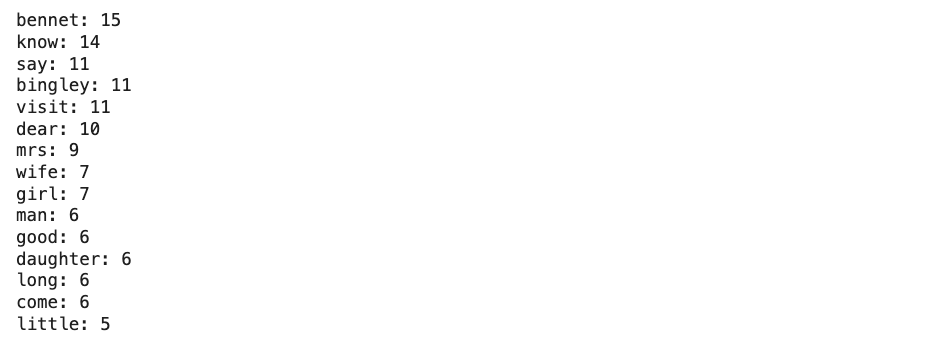

In [30]:
import operator

def print_top_words(word_counts_dict, num_words=15):
    """
    Prints the top most frequent words from a word frequency dictionary.

    Args:
        word_counts_dict: A dictionary where keys are words and values are their frequencies.
        num_words: The number of top words to print (default is 15).
    """
    # Sort the dictionary by values (counts) in descending order
    sorted_word_counts = dict(sorted(word_counts_dict.items(), key=operator.itemgetter(1), reverse=True))

    # Get the top N words and counts
    top_words = list(sorted_word_counts.items())[:num_words]

    print(f"Top {num_words} Most Frequent Meaningful Words:")
    print("-" * 30)
    for word, count in top_words:
        print(f"{word}: {count}")

# Use the function to print the top 15 meaningful words
print_top_words(meaningful_word_counts, 15)

Top 15 Most Frequent Meaningful Words:
------------------------------
bennet: 15
know: 14
say: 11
bingley: 11
visit: 11
dear: 10
mrs: 9
wife: 7
girl: 7
man: 6
good: 6
daughter: 6
long: 6
come: 6
little: 5


### Deliverable

Download the notebook by clicking on the File Menu (below the name of the file), Download > Download .ipynb and submit them.

1. CS110_Project4.ipynb with all TODO tasks done
